In [1]:
import torch
import matplotlib.pyplot as plt
from network import AvatarNet
from utils import imload, maskload, imshow

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
torch.cuda.is_available()

True

In [4]:
path = './check_point.pth'
check_point = torch.load(path)

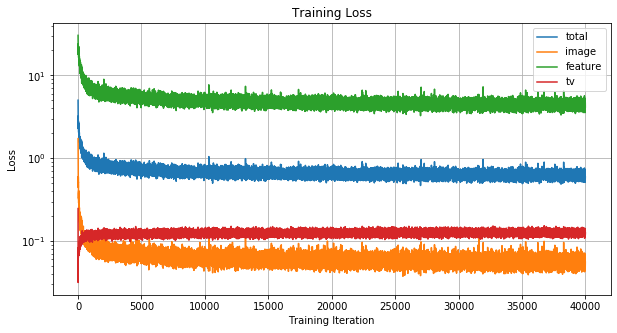

In [5]:
loss_seq = check_point['loss_seq']
plt.figure(figsize=(10, 5))
for key, value in loss_seq.items():
    plt.semilogy(value, label=key)
plt.xlabel("Training Iteration"); plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.title("Training Loss")
plt.show()    

In [6]:
network = AvatarNet().to(device)
network.load_state_dict(check_point['state_dict'])

<All keys matched successfully>

In [7]:
content_path = 'image/000002.jpg'
style_path = 'sample_images/style/mondrian.jpg'
imsize, cropsize, cencrop = 176, 176, True

content_img = imload(content_path, imsize, cropsize, cencrop).to(device)
style_img = imload(style_path, imsize, cropsize, cencrop).to(device)

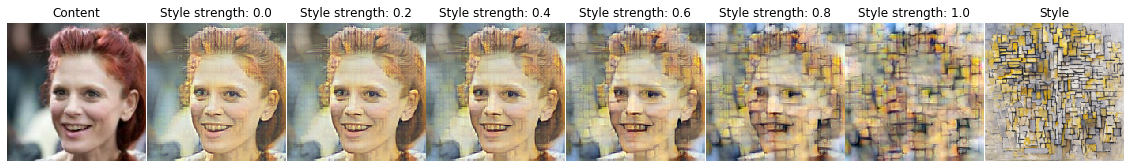

In [8]:
plt.figure(figsize=(20, 5)); plt.subplots_adjust(wspace=0.01)
for count, style_strength in enumerate([a/10 for a in range(0,11,2)], 2):
    with torch.no_grad():
        stylized_img = network(content_img, [style_img], style_strength=style_strength)
        plt.subplot(1, 8, count); plt.imshow(imshow(stylized_img)); plt.title("Style strength: %1.1f"%); plt.axis('off')
plt.subplot(1, 8, 1); plt.imshow(imshow(content_img)); plt.title("Content"); plt.axis('off')
plt.subplot(1, 8, 8); plt.imshow(imshow(style_img)); plt.title("Style"); plt.axis('off')
plt.savefig('content_style_interpolation.jpg', bbox_inches='tight', quality=100, dpi=350)
plt.show()

In [15]:
content_path = 'sample_images/content/blonde_girl.jpg'
style_paths = ['sample_images/style/mondrian.jpg', 'sample_images/style/abstraction.jpg']
imsize, cropsize, cencrop = 512, 512, True

content_img = imload(content_path, imsize, cropsize, cencrop).to(device)
style_imgs = [imload(style_path, imsize, cropsize, cencrop).to(device) for style_path in style_paths]

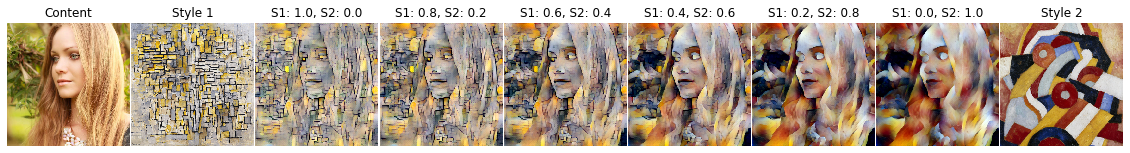

In [16]:
plt.figure(figsize=(20, 5)); plt.subplots_adjust(wspace=0.01)
for count, alpha in enumerate([a/10 for a in range(0,11,2)], 3):
    with torch.no_grad():
        stylized_img = network(content_img, style_imgs, style_strength=1.0, interpolation_weights=[1-alpha, alpha])
        plt.subplot(1, 9, count); plt.imshow(imshow(stylized_img)); plt.title("S1: %1.1f, S2: %1.1f"%(1-alpha, alpha)); plt.axis('off')
plt.subplot(1, 9, 1); plt.imshow(imshow(content_img)); plt.title("Content"); plt.axis('off')
plt.subplot(1, 9, 2); plt.imshow(imshow(style_imgs[0])); plt.title("Style 1"); plt.axis('off')
plt.subplot(1, 9, 9); plt.imshow(imshow(style_imgs[1])); plt.title("Style 2"); plt.axis('off')
plt.savefig('multiple_style_interpolation.jpg', bbox_inches='tight', quality=100, dpi=350)
plt.show()

In [17]:
content_path = 'sample_images/content/blonde_girl.jpg'
style_paths = ['sample_images/style/mondrian.jpg', 'sample_images/style/abstraction.jpg']
mask_paths = ['sample_images/mask/blonde_girl_mask1.jpg', 'sample_images/mask/blonde_girl_mask2.jpg']
imsize= 512

content_img = imload(content_path, imsize).to(device)
style_imgs = [imload(style_path, imsize).to(device) for style_path in style_paths]
mask_imgs = [maskload(mask_path).to(device) for mask_path in mask_paths]

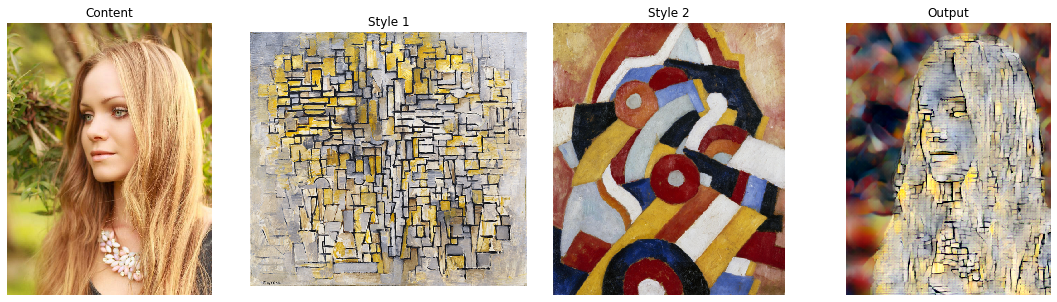

In [18]:
plt.figure(figsize=(20, 5)); plt.subplots_adjust(wspace=0.01)
with torch.no_grad():
    stylized_img = network(content_img, style_imgs, masks=mask_imgs, style_strength=1.0, interpolation_weights=[1, 1])
plt.subplot(1, 4, 1); plt.imshow(imshow(content_img)); plt.title("Content"); plt.axis('off')
plt.subplot(1, 4, 2); plt.imshow(imshow(style_imgs[0])); plt.title("Style 1"); plt.axis('off')
plt.subplot(1, 4, 3); plt.imshow(imshow(style_imgs[1])); plt.title("Style 2"); plt.axis('off')
plt.subplot(1, 4, 4); plt.imshow(imshow(stylized_img)); plt.title("Output"); plt.axis('off')
plt.savefig('masked_stylization.jpg', bbox_inches='tight', quality=100, dpi=350)
plt.show()

In [19]:
content_path = 'sample_images/content/blonde_girl.jpg'
style_path = 'sample_images/style/mondrian.jpg'
imsize, cropsize, cencrop = 512, 512, True

content_img = imload(content_path, imsize, cropsize, cencrop).to(device)
style_img = imload(style_path, imsize, cropsize, cencrop).to(device)

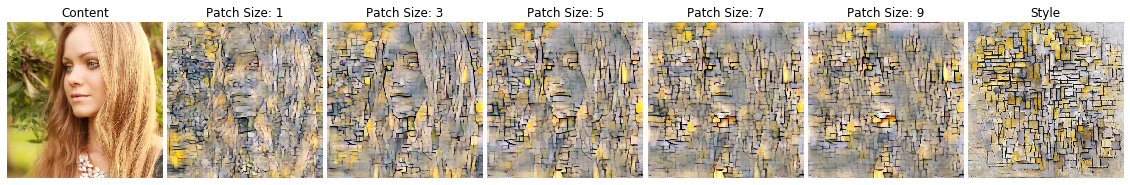

In [20]:
plt.figure(figsize=(20, 5)); plt.subplots_adjust(wspace=0.03)
for count, patch_size in enumerate([1, 3, 5, 7, 9], 2):
    with torch.no_grad():
        stylized_img = network(content_img, [style_img], patch_size=patch_size)
        plt.subplot(1, 7, count); plt.imshow(imshow(stylized_img)); plt.title("Patch Size: %d"%patch_size); plt.axis('off')
plt.subplot(1, 7, 1); plt.imshow(imshow(content_img)); plt.title("Content"); plt.axis('off')
plt.subplot(1, 7, 7); plt.imshow(imshow(style_img)); plt.title("Style"); plt.axis('off')
plt.savefig('patch_size_variation.jpg', bbox_inches='tight', quality=100, dpi=350)
plt.show()

In [21]:
content_path = 'sample_images/content/blonde_girl.jpg'
style_path = 'sample_images/style/mondrian.jpg'
imsize, cropsize, cencrop = 512, 512, True

content_img = imload(content_path, imsize, cropsize, cencrop).to(device)
style_img = imload(style_path, imsize, cropsize, cencrop).to(device)

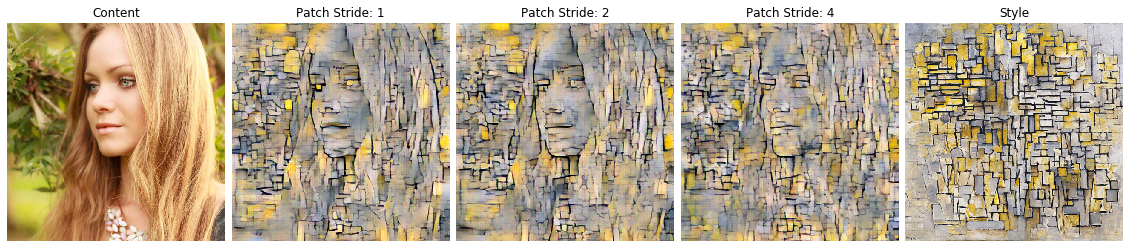

In [22]:
plt.figure(figsize=(20, 5)); plt.subplots_adjust(wspace=0.03)
for count, patch_stride in enumerate([1, 2, 4], 2):
    with torch.no_grad():
        stylized_img = network(content_img, [style_img], patch_stride=patch_stride)
        plt.subplot(1, 5, count); plt.imshow(imshow(stylized_img)); plt.title("Patch Stride: %d"%patch_stride); plt.axis('off')
plt.subplot(1, 5, 1); plt.imshow(imshow(content_img)); plt.title("Content"); plt.axis('off')
plt.subplot(1, 5, 5); plt.imshow(imshow(style_img)); plt.title("Style"); plt.axis('off')
plt.savefig('patch_stride_variation.jpg', bbox_inches='tight', quality=100, dpi=350)
plt.show()

In [23]:
import time
import torch

from network import AvatarNet, Encoder
from utils import ImageFolder, imsave, lastest_arverage_value

def network_train(args):
    # set device
    device = torch.device('cuda' if args.gpu_no >= 0 else 'cpu')

    # get network
    network = AvatarNet(args.layers).to(device)

    # get data set
    data_set = ImageFolder(args.content_dir, args.imsize, args.cropsize, args.cencrop)

    # get loss calculator
    loss_network = Encoder(args.layers).to(device)
    mse_loss = torch.nn.MSELoss(reduction='mean').to(device)
    loss_seq = {'total':[], 'image':[], 'feature':[], 'tv':[]}

    # get optimizer
    for param in network.encoder.parameters():
        param.requires_grad = False
    optimizer = torch.optim.Adam(network.decoder.parameters(), lr=args.lr)

    # training
    for iteration in range(args.max_iter):
        data_loader = torch.utils.data.DataLoader(data_set, batch_size=args.batch_size, shuffle=True)
        input_image = next(iter(data_loader)).to(device)

        output_image = network(input_image, [input_image], train=True)

        # calculate losses
        total_loss = 0
        ## image reconstruction loss
        image_loss = mse_loss(output_image, input_image)
        loss_seq['image'].append(image_loss.item())
        total_loss += image_loss

        ## feature reconstruction loss
        input_features = loss_network(input_image)
        output_features = loss_network(output_image) 
        feature_loss = 0
        for output_feature, input_feature in zip(output_features, input_features):
            feature_loss += mse_loss(output_feature, input_feature)
        loss_seq['feature'].append(feature_loss.item())
        total_loss += feature_loss * args.feature_weight

        ## total variation loss
        tv_loss = calc_tv_loss(output_image)
        loss_seq['tv'].append(tv_loss.item())
        total_loss += tv_loss * args.tv_weight

        loss_seq['total'].append(total_loss.item())

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # print loss log and save network, loss log and output images
        if (iteration + 1) % args.check_iter == 0:
            imsave(torch.cat([input_image, output_image], dim=0), args.save_path+"training_image.png")
            print("%s: Iteration: [%d/%d]\tImage Loss: %2.4f\tFeature Loss: %2.4f\tTV Loss: %2.4f\tTotal: %2.4f"%(time.ctime(),iteration+1, 
                args.max_iter, lastest_arverage_value(loss_seq['image']), lastest_arverage_value(loss_seq['feature']), 
                lastest_arverage_value(loss_seq['tv']), lastest_arverage_value(loss_seq['total'])))
            torch.save({'iteration': iteration+1,
                'state_dict': network.state_dict(),
                'loss_seq': loss_seq},
                args.save_path+'check_point.pth')

    return network

def calc_tv_loss(x):
    tv_loss = torch.mean(torch.abs(x[:, :, :, :-1] - x[:, :, :, 1:])) 
    tv_loss += torch.mean(torch.abs(x[:, :, :-1, :] - x[:, :, 1:, :]))
    return tv_loss